In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
import os

In [2]:
# get the preprocessed image from the directory
test = ImageDataGenerator()
testing_data = test.flow_from_directory("./testing/", target_size=(224,224), class_mode="categorical", subset="training",shuffle=True, batch_size=255)

X_test, y_test = testing_data.next()

Found 255 images belonging to 2 classes.


In [3]:
testing_data.class_indices

{'covid': 0, 'health': 1}

In [4]:
len(X_test)

255

In [5]:
# load the trained model
model = keras.models.load_model('C:/Users/Vern Sin/Documents/Jupyter/CXR Classification/cnn_vgg16')

In [6]:
# predict the test set using the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_new_pred = []
for prediction in y_pred:
    if prediction == 0:
        y_new_pred.append([1,0])
    else:
        y_new_pred.append([0,1])

In [7]:
y_new_pred

[[1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 

In [8]:
y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [9]:
from sklearn import metrics

# calculate model test accuracy
accuracy = metrics.accuracy_score(y_test, y_new_pred)
accuracy

0.9450980392156862

In [10]:
# draw the ROC and get AUC
bi_y_test = np.argmax(y_test, axis=-1)
fpr, tpr, _ = metrics.roc_curve(bi_y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

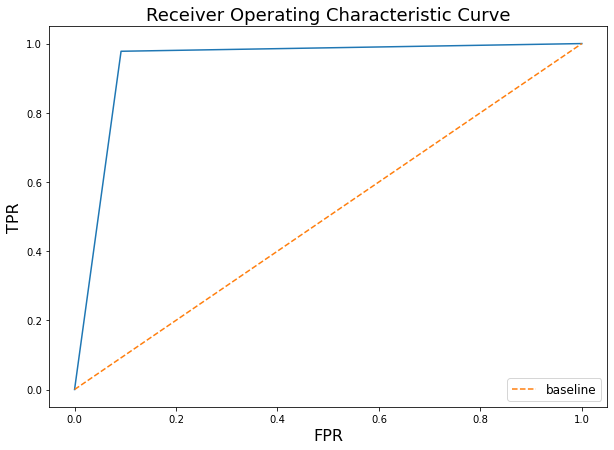

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [12]:
metrics.roc_auc_score(bi_y_test, y_pred)

0.9430555555555555

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

[Text(0, 0.5, 'covid'), Text(0, 1.5, 'health')]

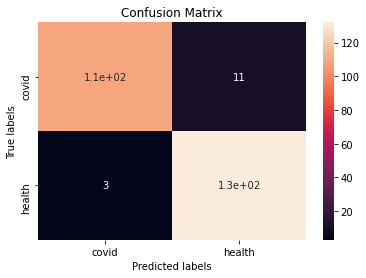

In [14]:
# draw confusion matrix with heatmap
cm = plt.subplot()

conf_matrix = confusion_matrix(bi_y_test, y_pred)
conf_matrix_hm = sn.heatmap(conf_matrix, annot=True)

cm.set_xlabel('Predicted labels')
cm.set_ylabel('True labels')
cm.set_title('Confusion Matrix')
cm.xaxis.set_ticklabels(['covid','health'])
cm.yaxis.set_ticklabels(['covid','health'])

In [15]:
conf_matrix

array([[109,  11],
       [  3, 132]], dtype=int64)